# The Depression Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as mse
pd.options.mode.chained_assignment = None

In [3]:
url= 'https://raw.githubusercontent.com/hadarkosto/final-project-AX/main/the%20depression%20dataset.csv'
dep_df1 = pd.read_csv(url) 
dep_df= dep_df1.copy(deep= True)
dep_df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,06-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,06-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,06-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


### הצגת הנתונים

In [4]:
dep_df['afftype'] = dep_df['afftype'].replace([1,2,3],['bipolar II','unipolar depressive','bipolar I'])
new_a=pd.get_dummies(dep_df[['afftype']])
dep_df = pd.concat([dep_df,new_a],axis=1)


dep_df['gender'] = dep_df['gender'].replace([1,2],['F','M'])  #שינינו את הערכים בעמודה של המין לגבר אישה במקום 1,2
dep_df_split= pd.get_dummies(dep_df['gender'])
dep_df = pd.concat([dep_df ,dep_df_split],axis=1) 

dep_df.head()

#סידור של העמודה "מין" לפי גבר או אישה
#סידור של אפטייפ

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,afftype_bipolar I,afftype_bipolar II,afftype_unipolar depressive,F,M
0,condition_1,11,M,35-39,unipolar depressive,2.0,2.0,06-10,1.0,2.0,19.0,19.0,0,0,1,0,1
1,condition_2,18,M,40-44,bipolar II,2.0,2.0,06-10,2.0,2.0,24.0,11.0,0,1,0,0,1
2,condition_3,13,F,45-49,unipolar depressive,2.0,2.0,06-10,2.0,2.0,24.0,25.0,0,0,1,1,0
3,condition_4,13,M,25-29,unipolar depressive,2.0,2.0,11-15,1.0,1.0,20.0,16.0,0,0,1,0,1
4,condition_5,13,M,50-54,unipolar depressive,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0,0,1,0,1


In [5]:
#הוספת עמודה בשם "מספרים " הממספרת את השורות
dep_df['Numbers']=1
for i in range(0, len(dep_df['number'])):
    dep_df['Numbers'][i]=int(i)+1


In [6]:
by_age = dep_df.groupby('age')['Numbers'].count()# סכימה של מס האנשים בכל טווח גילאים 

#### נרצה לבדוק כמה אנשים יש בכל קבוצת גיל, בכדי לראות את התפלגות הגילאים של הנבדקים 

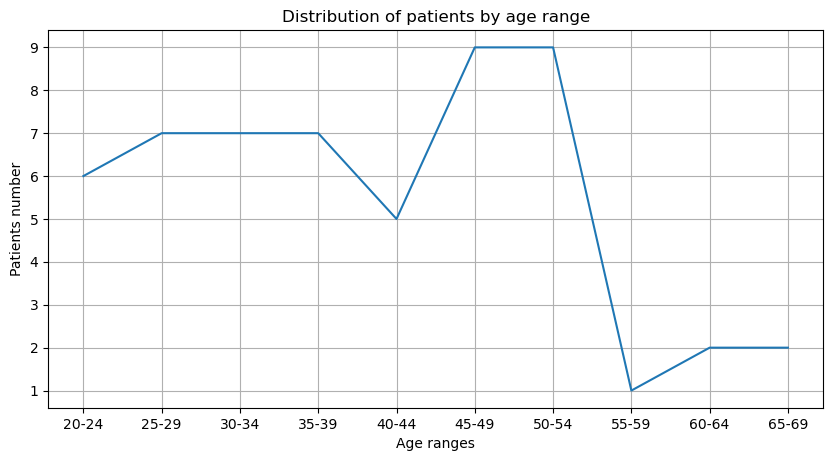

In [15]:
plt.figure(figsize=(10, 5), dpi = 100)

plt.title('Distribution of patients by age range')

plt.plot(by_age.index, by_age.values)

plt.ylabel('Patients number')
plt.xlabel('Age ranges')
plt.grid()
plt.show()


<div style="direction:rtl"> 
ניתן לראות שרוב אוכלוסיית המשתתפים במחקר היו בטווח גילאים של 45-54
</div> 

#### הנתונים לאחר הורדת קבוצת הביקורת

In [8]:
dep_df['edu'][21]='Unknown' 
dep_df= dep_df.dropna() #הורדת קבוצת הביקורת (תוך הורדת ערכים חסרים)
dep_df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,afftype_bipolar I,afftype_bipolar II,afftype_unipolar depressive,F,M,Numbers
0,condition_1,11,M,35-39,unipolar depressive,2.0,2.0,06-10,1.0,2.0,19.0,19.0,0,0,1,0,1,1
1,condition_2,18,M,40-44,bipolar II,2.0,2.0,06-10,2.0,2.0,24.0,11.0,0,1,0,0,1,2
2,condition_3,13,F,45-49,unipolar depressive,2.0,2.0,06-10,2.0,2.0,24.0,25.0,0,0,1,1,0,3
3,condition_4,13,M,25-29,unipolar depressive,2.0,2.0,11-15,1.0,1.0,20.0,16.0,0,0,1,0,1,4
4,condition_5,13,M,50-54,unipolar depressive,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0,0,1,0,1,5
5,condition_6,7,F,35-39,unipolar depressive,2.0,2.0,06-10,1.0,2.0,18.0,15.0,0,0,1,1,0,6
9,condition_10,9,M,45-49,unipolar depressive,2.0,2.0,06-10,1.0,2.0,28.0,21.0,0,0,1,0,1,10
10,condition_11,14,F,45-49,unipolar depressive,2.0,2.0,06-10,1.0,2.0,24.0,24.0,0,0,1,1,0,11
11,condition_12,12,M,40-44,bipolar II,2.0,2.0,06-10,2.0,2.0,25.0,21.0,0,1,0,0,1,12
12,condition_13,14,M,35-39,bipolar II,2.0,2.0,11-15,2.0,2.0,18.0,13.0,0,1,0,0,1,13


In [ ]:
fig, axes = plt.subplots(figsize=(20, 10), ncols= 2, nrows=2)
sns.countplot(ax=axes[0][0], x="gender", data=dep_df)
sns.countplot(ax=axes[0][1], x="edu", data=dep_df)
sns.countplot(ax=axes[1][0], x="afftype", data=dep_df)
sortedage= dep_df.sort_values('age',ascending=True)
sns.countplot(ax=axes[1][1], x="age", data=sortedage)
plt.show()


#### :יצירת ממוצע של מספר שנות לימוד

In [ ]:
dep_df['edu'][21]='00-00'
#יש ערך ריק ולכן מילאנו אותו ב0

lst=dep_df['edu'].tolist()
for row in range(0,20):
    newvalue=dep_df['edu'].iloc[row].split('-')
    newvalue=(int(newvalue[0])+int(newvalue[-1]))/2 ##ממוצע
    lst[row] =int(newvalue)
    
dep_df['edu']=lst

In [ ]:
plt.figure(figsize=(10, 8), dpi =70)   
plt.subplots_adjust(wspace=0.4)
features1=['afftype_bipolar I','afftype_bipolar II','afftype_unipolar depressive','melanch','edu', 'work','marriage']
corrs1 = dep_df[features1].corr(method = 'pearson')
    
sns.heatmap(corrs1,cmap='OrRd_r', center=0, annot = True)

<div style="direction:rtl"> 
ניתן לראות שיש קשר בין נשואים לסוגי המחלות ,זוהי קורלציה אשר משפיעה ורלוונטית לנתונים, ולכן נחקור את הקשר הזה
</div> 

#### הקשר בין נשואים או לא נשואים לסוג מחלה
##### 1- נשוי
##### 2- לא נשוי 

In [ ]:
# 1= married , 2= single
sortedage= dep_df.sort_values('age',ascending=True)
plt.figure(figsize=(12, 8), dpi = 70)   
plt.title('Distribution of age range by respect to their gender')
sns.barplot(x = 'age', y = 'marriage', hue = 'gender',palette="Oranges_r", data = sortedage)
plt.show()

<div style="direction:rtl"> 
בגרף מתוארת התפלגות הנשואים-לא נשואים לפי מגדר וגיל. ניתן לראות כי רוב הערכים הם מעל 1. דבר המעיד על כך שהיה רוב לא נשוי ברוב קבוצות הגילאים בשני המגדרים, אך לא באופן מובהק. 
</div>

In [ ]:
dep_df['marriage'] = dep_df['marriage'].replace([1,2],['married','single'])
dep_df['marriage'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
dep_df.groupby('marriage')[['afftype_bipolar II','afftype_bipolar I','afftype_unipolar depressive']].sum()

In [ ]:
sns.countplot(x="afftype",hue='marriage', data=dep_df)

<div style="direction:rtl"> 
בגרף מתוארת התפלגות הנשואים-לא נשואים לפי 3 סוגי הדכאונות. 
</div>

<div style="direction:rtl"> 
ניתן לראות מהטבלה כי רוב בעלי הדיכאון החד קוטבי נשואים בשונה מדו קוטביות מסוג אחד ושתיים 
</div>

#### הקשר בין מי שעובד או מי שלא עובד מול סוג המחלה 

In [ ]:
dep_df['work'] = dep_df['work'].replace([1,2],['working','not working'])
dep_df['work'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
dep_df.groupby('work')[['afftype_bipolar II','afftype_bipolar I','afftype_unipolar depressive']].sum()

In [ ]:
sns.countplot(x="afftype",hue='work', data=dep_df)

<div style="direction:rtl"> 
ניתן לראות מהטבלה כי רוב בעלי הדיכאון החד קוטבי עובדים בשונה מדו קוטביות מסוג אחד ושתיים 
</div>

#### תובנה ראשונה


<div style="direction:rtl"> 
בימינו נישואים ועבודה מהויים מדד לאורח חיים תקין. מהטבלאות ניתן לראות בבירור כי המאופיינים בדיכאון מסוג חד קוטבי (דיכאון קליני) הם ברובם נשואים והיחידים שמצליחים להשתלב במעגל העבודה. מכאן ניתן להסיק כי מחלה זו משפיעה פחות על אורך החיים התקין של המאופיינים בה לעומת המאופיינים בשאר המחלות.
</div>

#### גרף שמראה ציוני מבחן התחלתי מול ציוני מבחן סופי


In [ ]:
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
dep_df.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras


 
<div style="direction:rtl"> 
בגרף זה ניתן לראות את פילוג הציונים במבחן ההתחלתי ובמבחן הסופי של כל נבדק מהניסוי.
המבחן מורכב משאלות בעלות ערך מספרי שונה לכל תשובה. ככל שסה"כ הניקוד במבחן גבוהה יותר הוא מדמה דיכאון רב יותר.
אנו מצפות שציון המבחן הסופי יהיה נמוך יותר מציון המבחן ההתחלתי, ולפי הגרף ניתן לראות כי אכן זה מה שקרה.
</div>


In [ ]:
dep_df.pivot_table(['afftype_bipolar II','afftype_unipolar depressive','afftype_bipolar I'],'gender') 

<div style="direction:rtl"> 
בטבלה זו ניתן לראות כי ישנו רוב של משתתפים אשר מאופיינים בחד קוטביות ואין נשים המאופיינות בדו קוטביות מסוג אחד.
</div>

In [ ]:
dep_df.pivot_table(['madrs1','madrs2'],'afftype')

<div style="direction:rtl"> 
בטבלה זו ניתן לראות כי ישנו פער מאוד גדול בציונים במאופיינים בדו קוטביות מסוג 2.
</div>

<div style="direction:rtl"> 
כעת, לאחר שראינו את הממצאים מהטבלאות הקודמות וכי אין הרבה משתתפים המאופיינים בדו קוטביות מסוג 2 אך שם היה הפער הגדול ביותר בין הציונים, ננסה להבין אם יש קשר אחר המסביר את הקפיצה הגדולה בציונים ונבדוק האם זה קשור למגדר של המשתתפים
</div>

In [ ]:
dep_df.pivot_table(['madrs1','madrs2'],'gender') 

#### תובנה שנייה:

<div style="direction:rtl"> 
בטבלה ניתן לראות את ממוצע הציונים של נשים וגברים במבחן הראשון והשני, ניתן לראות כי אצל נשים ממוצע הציונים בשני המבחנים גבוה.
    משמע נשים הן בעלות מאפייני דיכאון רבים יותר מבקרב הגברים, כמו כן הפער בין שני המבחנים גדול יותר אצל הגברים.
    מכאן אנו מסיקות כי חל שיפור משמעותי יותר בקרב גברים מאשר בקרב נשים על אף הפילוג הרציף של גברים ונשים בסוגי המחלות השונים מכאן אנו מניחות כי הפערים אינם בגלל סוג המחלה אלא בגלל המגדר.
</div>

In [ ]:
df_days_madrs=dep_df[['days','madrs2']]
#הפרדנו את הדאטא לפי העמודות ימים וציון המבחן הסופי
sorted_data=df_days_madrs.sort_values(by=['days','madrs2'])
#sorted_data
#סידרנו את הערכים מהקטן לגדול

In [ ]:
sns.regplot(x='days', y='madrs2', data=sorted_data)

#### תובנה 3:

<div style="direction:rtl"> 
בגרף ניסינו לבדוק האם מספר הימים בהם השתתפו במחקר משפיע על הציון של הנבדקים, הנחנו כי ככל שמספר הימים יהיה גבוה יותר כך ציוני המבחן הסופי יהיו נמוכים דבר המעיד על שיפור במאפייני הדיכאון שנבדקו במבחן הראשון. ניתן לראות כי לא נמצא קשר בין 2 גורמים אלו וישנו פיזור גדול יחסית סביב קו הרגרסייה וכי אין מגמה אחידה דבר המעיד על חוסר התאמה.
</div>

<div style="direction:rtl">
לכן, החלטנו לבדוק האם ניתן לחזות את ציוני המבחן הסופי עפ"י מדדים אחרים שנקבע מראש ואינם קשורים למספר הימים או מין הנבדקים, דברים אשר גילינו קודם שאינם בעלי השפעה על הציון במבחן זה
</div>

#### בניית מודל לחיזוי הציון הסופי של הנבדקים לפי מספר פרמטרים

In [ ]:
dep_df['age']= dep_df['age'].astype('category').cat.codes


In [ ]:
features =['M','F','afftype_bipolar II','afftype_unipolar depressive','afftype_bipolar I','age','madrs1']
X = dep_df[features]
y = dep_df['madrs2']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2) 

madrs2model = DecisionTreeRegressor(max_depth=3,random_state=2)
madrs2model = madrs2model.fit(X_train,y_train)

In [ ]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    y_alt=y_test.values.reshape((-1,1))
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
    print("MSE: {:.3f}".format(mse(pred,y_alt,squared=False)))
    
eval(X_test,y_test,madrs2model)
print("Depth:", madrs2model.get_depth())

In [ ]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(20,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

In [ ]:
model = DecisionTreeRegressor(max_depth=3,random_state=2)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(20,10))

### סיכום

<div style="direction:rtl"> 
לאחר ניתוח הנתונים נוכחנו לדעת כי אנשים המאופיינים בחד קוטביות (דיכאון קליני) ברובם נשואים ומשתלבים בשוק העבודה ,בניגוד למאופיינים בדו קוטביות. דבר המעיד על כך שדיכאון מסוג זה הינו ה"קל" מבין שלושת הדיכאונות בהם עסקנו. 
תחילה חשבנו שסוג המחלה הוא שישפיע על הציון הסופי. התברר כי לסוג המחלה ישנה השפעה על ציונם אך ההבדל העיקרי שהביא לשיפור היה דווקא מינם והוא זה שהביא לירידה במאפייני הדיכאון. לאחר מכן ניסינו לבדוק האם מספר הימים בהם הנבדקים טופלו משפיע על ציונם הסופי והתברר כי אין קשר ברור בין מספר הימים לציונם הסופי ולא ניתן לחזות אותו בעזרת המודל שיצרנו.
</div>